In [2]:
import tensorflow


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [8]:
# flattening 2d array into 1d array convert and then classify the image

In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np 

In [14]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [16]:
len(X_train)

60000

In [18]:
len(X_test)

10000

In [20]:
X_train[0].shape

(28, 28)

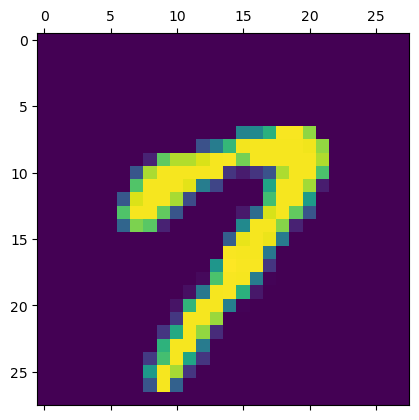

In [60]:
plt.matshow(X_train[15])

In [40]:
y_train[2]

4

In [56]:
len(X_train[1])

28

In [48]:
# now we have to flaten it 

In [141]:
X_train_flattend = X_train.reshape(len(X_train),28*28)  / 255.0
X_test_flattend = X_test.reshape(len(X_test) , 28*28) / 255.0

In [143]:
(X_train_flattend).shape

(60000, 784)

In [152]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten and normalize
X_train_flattend = X_train.reshape(len(X_train), 28*28) / 255.0
X_test_flattend = X_test.reshape(len(X_test), 28*28) / 255.0

# Define model
model = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(10, activation='sigmoid')
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(X_train_flattend, y_train, epochs=5, validation_data=(X_test_flattend, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8072 - loss: 0.7328 - val_accuracy: 0.9151 - val_loss: 0.3068
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9141 - loss: 0.3116 - val_accuracy: 0.9226 - val_loss: 0.2782
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9217 - loss: 0.2794 - val_accuracy: 0.9242 - val_loss: 0.2733
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9220 - loss: 0.2741 - val_accuracy: 0.9269 - val_loss: 0.2670
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9276 - loss: 0.2618 - val_accuracy: 0.9248 - val_loss: 0.2701


In [160]:
y_predicted = model.predict(X_train_flattend)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


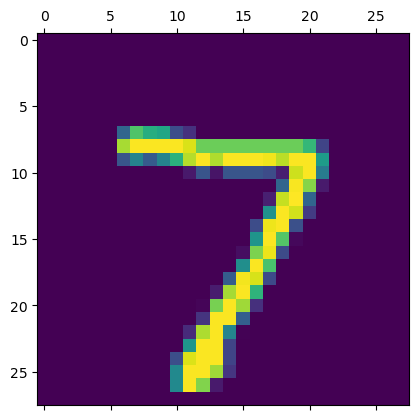

In [162]:
plt.matshow(X_test[0])

In [164]:
y_predicted[0]

array([3.7665613e-02, 8.6374101e-05, 6.1786339e-02, 9.6243185e-01,
       4.5286401e-05, 9.8625958e-01, 1.2900123e-04, 5.3836625e-02,
       5.3536903e-02, 1.6377341e-02], dtype=float32)

In [166]:
np.argmax(y_predicted[0])

5

In [170]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[5, 0, 4, 1, 9]

InvalidArgumentError: {{function_node __wrapped__Pack_N_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Shapes of all inputs must match: values[0].shape = [10000] != values[1].shape = [60000] [Op:Pack] name: stack